# UBER DATA ANALYSIS

Introduction: Navigating Uber Insights

In this Python-driven Uber data analysis, we dive into a trove of ride statistics to uncover trends and patterns. From peak hours to popular routes, our exploration aims to distill actionable insights, providing a snapshot of Uber's impact on urban mobility. Join us as we decode the data and illuminate the driving forces behind the ride-sharing phenomenon.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('uberdrive.csv')

# Showcase the list 5 datset

In [6]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#  Showcase the last 5 dataset

In [7]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


# Show the dimension of the dataset.

In [8]:
df.shape

(1156, 7)

# Show the size of the dataset.

In [9]:
df.size

8092

# Print the information about all the variables of the data set.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Check for missing values.

In [11]:
df.isnull().values.any()

True

# How many missing values are present?

In [44]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

# Get the initial data (name it 'df') with dropping the NA values

In [46]:
df_uber = df.dropna()
print('Is there any NAN value left :-->',df_uber.isnull().values.any())
df_uber.head()

Is there any NAN value left :--> False


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [65]:
df_uber.isnull().sum()

START_DATE*      0
END_DATE*      653
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*         0
STARTDATE*     653
dtype: int64

# All the NAN values are drop, now  there is no missing values

# Get the summary of the original data (before dropping the 'na' values).

In [14]:
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


# Check the information of the new dataframe.

In [15]:
df_uber.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


# Get the unique start destinations

Having no 'na' values in the 'Start' variable 

In [16]:
un_start_destination = df['START*'].dropna()
unique_start= set(un_start_destination)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

# What is the total number of unique start destinations?

In [17]:
len(unique_start)

176

# Print the total number of unique stop destinations

In [18]:
un_stop_destination = df['STOP*'].dropna()
unique_stop= set(un_stop_destination)
print(unique_stop)
print('----------------------------------------------------------------')
print('The total  number of  unique stop is :--> ',len(unique_stop))

{'Latta', 'Washington', 'Fort Pierce', 'Burtrose', 'West Berkeley', 'Sand Lake Commons', 'Tenderloin', 'East Elmhurst', 'Unknown Location', 'Red River District', 'Winston Salem', 'Lexington Park at Amberly', 'Palo Alto', 'West Palm Beach', 'Renaissance', 'Potrero Flats', 'Katunayaka', 'Faubourg Marigny', 'Mebane', 'Redmond', 'Umstead', 'CBD', 'Waverly Place', 'Jamaica', 'Lower Garden District', 'Katy', 'Hudson Square', 'Sunnyside', 'Gulfton', 'Chessington', 'Tanglewood', 'Jackson Heights', 'Westpark Place', 'Agnew', 'Leesville Hollow', 'Metairie', 'Bywater', 'Downtown', 'Wake Co.', 'Lake Reams', 'Whitebridge', 'Northwest Rectangle', 'Williamsburg Manor', 'Palm Beach', 'Briar Meadow', 'Savon Height', 'Daytona Beach', 'Jamestown Court', 'Chapel Hill', 'Boone', 'Mcvan', 'Alief', 'Chalmette', 'South Congress', 'French Quarter', 'Noorpur Shahan', 'Weston', 'College Avenue', 'Colombo', 'El Cerrito', 'Almond', 'Long Island City', 'San Francisco', 'Capitol One', 'Cary', 'Preston', 'Islamabad',

# Print all the Uber trips that has the starting point of San Francisco.

In [19]:
df[df[ 'START*']== 'San Francisco' ]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


# What is the most popular starting point for the Uber drivers

In [20]:
starting_points = df['START*'].dropna()
uber_df = pd.DataFrame(starting_points.value_counts())
uber_df

,START*
Cary,201
Unknown Location,148
Morrisville,85
Whitebridge,68
Islamabad,57
...,...
Ridgeland,1
Daytona Beach,1
Sky Lake,1
Sand Lake Commons,1


In [21]:
starting_points = df['START*'].dropna()
uber_df = pd.DataFrame(starting_points.value_counts())
uber_df.sort_values(['START*'],ascending = False)
uber_df= uber_df.reset_index()   #indexing the location on the on the basis of  decending order.


In [22]:
starting_points = df['START*'].dropna()
uber_df = pd.DataFrame(starting_points.value_counts())
uber_df.sort_values(['START*'],ascending = False)
uber_df= uber_df.reset_index()   

uber_df =  uber_df.rename(columns={'index':'Starting Index','START*':'Count'})
uber_df


,Starting Index,Count
0,Cary,201
1,Unknown Location,148
2,Morrisville,85
3,Whitebridge,68
4,Islamabad,57
...,...,...
171,Ridgeland,1
172,Daytona Beach,1
173,Sky Lake,1
174,Sand Lake Commons,1


In [23]:
starting_points = df['START*'].dropna()
uber_df = pd.DataFrame(starting_points.value_counts())
uber_df.sort_values(['START*'],ascending = False)
uber_df= uber_df.reset_index()   

uber_df =  uber_df.rename(columns={'index':'Starting Index','START*':'Count'})
uber_df.loc[uber_df['Count'] == max(uber_df['Count'])]  #Giving the location from where maximum number of  trip  is taken 

,Starting Index,Count
0,Cary,201


# In this analysis, it is evident that Cary has the highest number of Uber trips based on the starting points. This observation suggests a high demand for Uber services in Cary, indicating a significant source of revenue for Uber in that location.

In [24]:
starting_points = df['START*'].dropna()
uber_df = pd.DataFrame(starting_points.value_counts())
uber_df.sort_values(['START*'],ascending = False)
uber_df= uber_df.reset_index()   

uber_df =  uber_df.rename(columns={'index':'Starting Index','START*':'Count'})
uber_df.loc[uber_df['Count'] == min(uber_df['Count'])]

,Starting Index,Count
89,Fuquay-Varina,1
90,Wake Co.,1
91,NOMA,1
92,Santa Clara,1
93,North Berkeley Hills,1
...,...,...
171,Ridgeland,1
172,Daytona Beach,1
173,Sky Lake,1
174,Sand Lake Commons,1


# The location with the least number of cab bookings could be attributed to various factors such as suboptimal Uber service, distance from the city center, high pricing, or the availability of alternative local transportation options like metro services.

# What is the most popular dropping point for the Uber drivers?

In [25]:
stopping_points = df['STOP*'].dropna()
uber_df = pd.DataFrame(stopping_points.value_counts())
uber_df.sort_values(['STOP*'],ascending = False)
uber_df= uber_df.reset_index()   

uber_df =  uber_df.rename(columns={'index':'Stopping Index','STOP*':'Count'})
uber_df.loc[uber_df['Count'] == max(uber_df['Count'])]

,Stopping Index,Count
0,Cary,203


# Cary emerges as both the maximum pickup and drop-off location. This suggests potential opportunities for Uber in Cary, as it could indicate a gap in local transportation options or a higher demand for Uber services due to possibly lower prices. Exploring promotional offers in areas with lower booking frequency might attract more customers and contribute to increased Uber utilization.

# List the most frequent route taken by Uber drivers.

In [26]:
fdf = df.dropna()
fdf= pd.DataFrame(fdf.groupby(['START*','STOP*']).size()) #Grouping the start and stop destination
fdf

0
START*        STOP*                 
Apex          Cary                10
              Holly Springs        1
Arabi         Metairie             1
Asheville     Topton               1
Austin        Katy                 1
...                               ..
Whitebridge   Wayne Ridge          4
              Westpark Place       3
              Whitebridge          2
              Williamsburg Manor   1
Winston Salem Asheville            1

[239 rows x 1 columns]

In [27]:
fdf = df.dropna()
fdf= pd.DataFrame(fdf.groupby(['START*','STOP*']).size())
fdf=fdf.rename(columns={ 0 :'Count'}) #renaming the  no of counting variable as count
fdf = fdf.sort_values(['Count'],ascending=False)  #arranging in decreasing order
fdf

Count
START*           STOP*                  
Cary             Morrisville          52
Morrisville      Cary                 51
Cary             Cary                 44
Unknown Location Unknown Location     30
Cary             Durham               30
...                                  ...
Katunayaka       Katunayaka            1
                 Unknown Location      1
Katunayake       Gampaha               1
Katy             Houston               1
Winston Salem    Asheville             1

[239 rows x 1 columns]

In [28]:
fdf = df.dropna()
fdf= pd.DataFrame(fdf.groupby(['START*','STOP*']).size())
fdf=fdf.rename(columns={ 0 :'Count'}) 
fdf = fdf.sort_values(['Count'],ascending=False)
max_count_route = fdf[fdf['Count'] == max(fdf['Count'])]
max_count_route

,,Count
START*,STOP*,
Cary,Morrisville,52


# The data reveals that the highest number of trips occur between Cary and Morrisville. This underscores the significance of Uber availability in this specific route. Introducing attractive promotions and ensuring a consistent Uber presence in this corridor could potentially attract and retain a substantial customer base.

# Print all types of purposes for the trip in an array.

In [29]:
print(np.array(df['PURPOSE*'].dropna().unique())) #for 10 different purposes uber facility is used

kdf= np.array(df['PURPOSE*'].dropna().unique())

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


In [30]:
kdf = df['MILES*'].groupby(df['PURPOSE*']).sum()
kdf = kdf.rename_axis('Purpose').reset_index(name='Miles')
kdf

,Purpose,Miles
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


# Plot a bar graph of Purposes vs Distance.

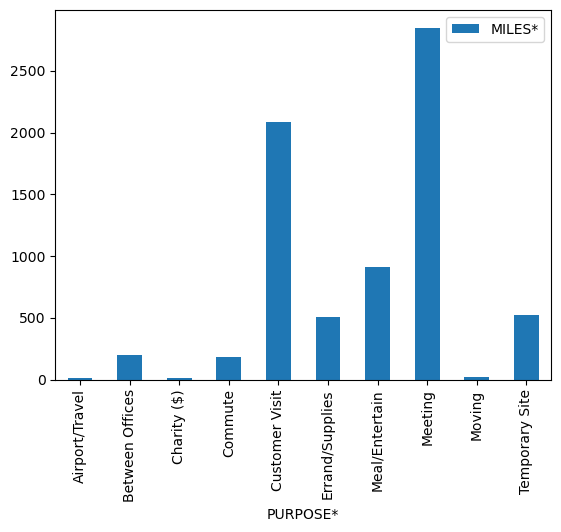

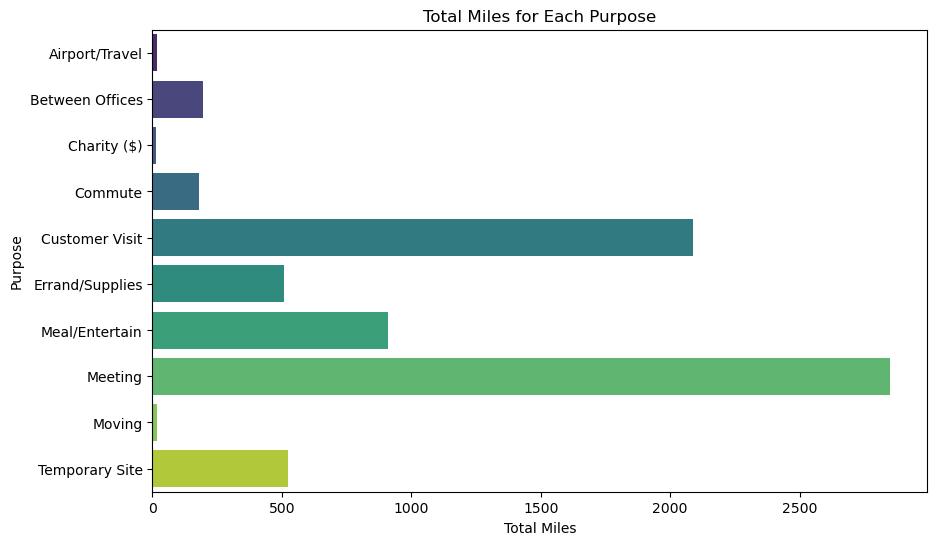

In [31]:
kdf = pd.DataFrame(df['MILES*'].groupby(df['PURPOSE*']).sum())
kdf.plot(kind = 'bar')
plt.show()

#or


kdf = kdf.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='MILES*', y='PURPOSE*', data=kdf, palette='viridis')
plt.title('Total Miles for Each Purpose')
plt.xlabel('Total Miles')
plt.ylabel('Purpose')
plt.show()   


# Analysis indicates that Uber is predominantly utilized for business purposes, such as customer visits or meetings, rather than personal travel. This suggests a higher level of trust in Uber's availability and reliability for business-related transportation needs, potentially due to its ability to efficiently reach specified destinations on time. In contrast, personal travel may see lower preference for Uber services.

# Plot number of trips vs Category of trips.

In [68]:
df['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

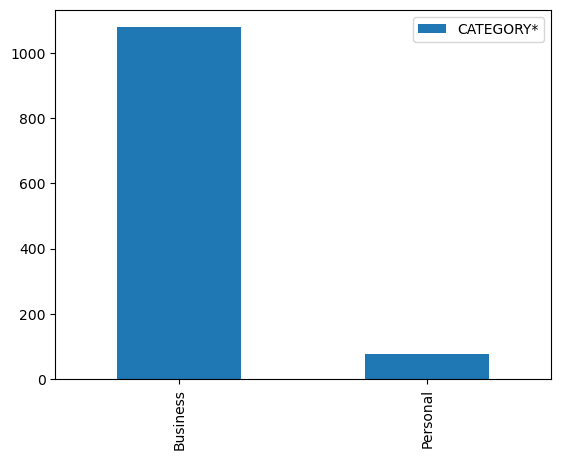

In [32]:
df.head()
ldf= pd.DataFrame(df['CATEGORY*'].value_counts())
ldf.reset_index()

ldf.plot(kind = 'bar')
plt.show()

# What is percentage  of trips that is Business and what is the percentage of trips that is Personal?


In [36]:
bdf = df.groupby(['CATEGORY*']).sum()

# Convert the DataFrame to numeric values
bdf = pd.to_numeric(bdf['MILES*'], errors='coerce')

business = bdf.iloc[0] / bdf.sum()
personal = bdf.iloc[1] / bdf.sum()

print('Business Percentage: --> ', business * 100)
print('Personal Percentage: --> ', personal * 100)

Business Percentage: -->  94.11947856153776
Personal Percentage: -->  5.880521438462232


C:\Users\sanya\AppData\Local\Temp\ipykernel_7784\2175110751.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bdf = df.groupby(['CATEGORY*']).sum()


# How long do people travel with uber?

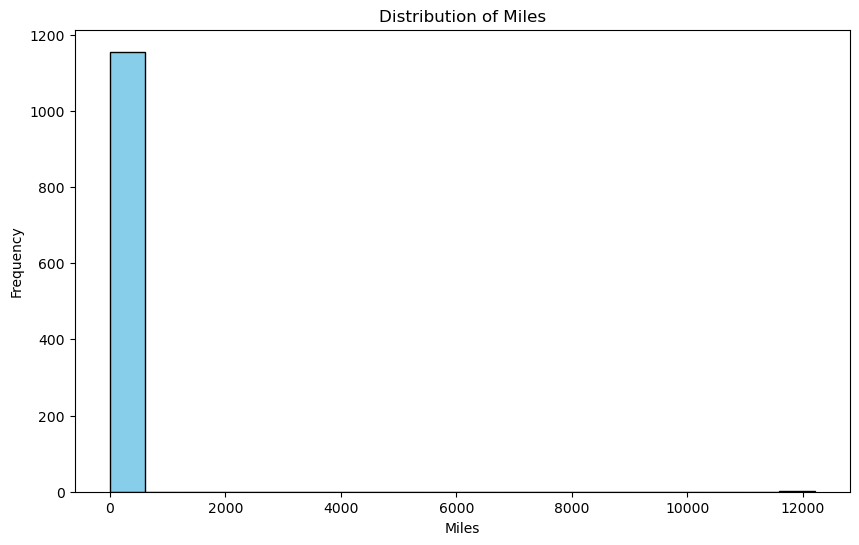

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(df['MILES*'],bins=20,  color='skyblue', edgecolor='black')  

plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')


plt.show()

# The histogram reveals a trend where Uber is predominantly utilized for shorter distances, suggesting that it is commonly chosen for daily commuting, attending meetings, or quick trips. To boost sales and broaden the user base, there is an opportunity to increase demand for long-distance travel by introducing schemes and attractive offers tailored to customers seeking extended journeys or tours.